In [1]:
pip install kaggle

In [2]:
from google.colab import files
files.upload()  # Загрузите kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gulzairova","key":"d9d5a21835929c5576d7dae912479ae4"}'}

In [3]:
# Перемещаем файл kaggle.json в нужную папку
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/

# Проверяем, что все настроено
!kaggle datasets list

ref                                                                  title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                    Chocolate Sales Data 📊🍫                                  14473  2025-03-19 03:51:40.270000          11334        200  1.0              
abdulmalik1518/mobiles-dataset-2025                                  Mobiles Dataset (2025)                                   20314  2025-02-18 06:50:24.370000          17126        289  1.0              
adilshamim8/student-depression-dataset                               Student Depression Dataset                              467020  2025-03-13 03:12:30.423000           3737      

In [4]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques

In [5]:
import zipfile

with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip", 'r') as zip_ref:
    zip_ref.extractall("house_prices")

In [6]:
import pandas as pd

# Загружаем данные
train_data = pd.read_csv('house_prices/train.csv')

# Проверим первые несколько строк
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Проверим, какие столбцы есть в датасете
print(train_data.columns)

# Убираем столбец "Id", если он есть
if "Id" in train_data.columns:
    train_data = train_data.drop(columns=["Id"])

# Выбираем только числовые столбцы
numeric_columns = train_data.select_dtypes(include=["number"]).columns

# Заполняем пропущенные значения средним значением по числовым столбцам
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())

# Выбираем только текстовые столбцы
text_columns = train_data.select_dtypes(include=["object"]).columns

# Заполняем пропуски в текстовых столбцах строкой "Unknown"
train_data[text_columns] = train_data[text_columns].fillna("Unknown")

# Проверим, как выглядит датасет после очистки
train_data.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,Inside,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,FR2,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,Inside,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,Corner,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,FR2,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Признаки (оставим только числовые столбцы)
X = train_data.select_dtypes(include=["float64", "int64"])

# Цель (цена)
y = train_data["SalePrice"]

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализуем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Переводим в тензоры PyTorch
import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [9]:
import torch.nn as nn
import torch.optim as optim

class HousePricePredictor(nn.Module):
    def __init__(self):
        super(HousePricePredictor, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Инициализируем модель, функцию потерь и оптимизатор
model = HousePricePredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(model)

HousePricePredictor(
  (fc1): Linear(in_features=37, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)


In [10]:
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Эпоха [{epoch+1}/{epochs}], Потери: {loss.item():.2f}")

print("Обучение завершено!")

Эпоха [50/500], Потери: 36349100032.00
Эпоха [100/500], Потери: 14191504384.00
Эпоха [150/500], Потери: 6785113600.00
Эпоха [200/500], Потери: 4460957696.00
Эпоха [250/500], Потери: 2855216640.00
Эпоха [300/500], Потери: 1840927616.00
Эпоха [350/500], Потери: 1275770624.00
Эпоха [400/500], Потери: 974134272.00
Эпоха [450/500], Потери: 782596096.00
Эпоха [500/500], Потери: 645989440.00
Обучение завершено!


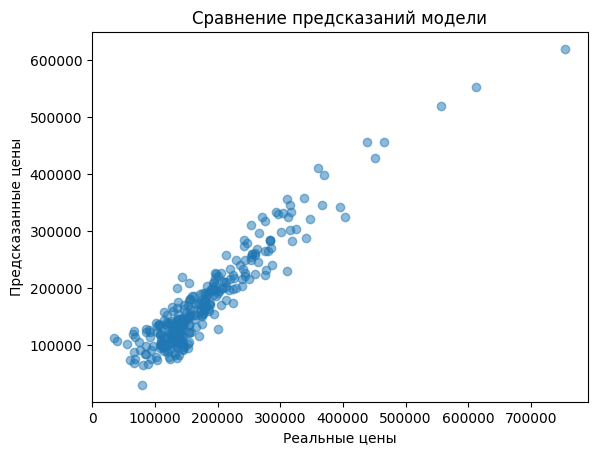

In [12]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)

# Конвертируем предсказания в numpy для сравнения
test_predictions = test_predictions.numpy().flatten()

# Визуализируем реальные и предсказанные цены
import matplotlib.pyplot as plt

plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel("Реальные цены")
plt.ylabel("Предсказанные цены")
plt.title("Сравнение предсказаний модели")
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import mean_absolute_error

model.eval()
with torch.no_grad():
    single_prediction = model(X_test_tensor[0].unsqueeze(0))  # Берем первый объект

predicted_price = single_prediction.item()
actual_price = y_test_tensor[0].item()  # Фактическая цена из тестового набора
price_difference = abs(predicted_price - actual_price)  # Разница в ценах

# Оценка качества модели на тестовой выборке
test_preds = model(X_test_tensor).detach().numpy().flatten()
mae = mean_absolute_error(y_test_tensor.numpy().flatten(), test_preds)

print(f"Предсказанная цена первого дома: {predicted_price:.2f}")
print(f"Фактическая цена первого дома: {actual_price:.2f}")
print(f"Разница в цене: {price_difference:.2f}")

Предсказанная цена первого дома: 151285.69
Фактическая цена первого дома: 154500.00
Разница в цене: 3214.31
